<a href="https://colab.research.google.com/github/Sumith-Pevekar/AmazonAlexaReviewSentimentAnalysis/blob/main/Amazon_Alexa_Review_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
from string import punctuation
from textblob import Word
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
data = pd.read_csv('/content/drive/MyDrive/AlexaReviewsDataset/amazon_alexa.tsv',sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.columns = data.columns.str.replace('verified_reviews', 'reviews')


In [4]:
data.isna().sum()


rating       0
date         0
variation    0
reviews      0
feedback     0
dtype: int64

In [5]:
data.drop(['date','variation'],axis=1,inplace=True)
data.head()

,rating,reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


In [6]:
data = data[data.rating != 3]


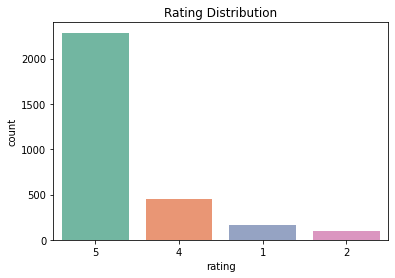

In [7]:
sns.set_palette(sns.color_palette('Set2'))
sns.countplot(
x='rating',
data=data,
order=data.rating.value_counts().index
)
plt.xlabel("rating")
plt.title("Rating Distribution");

In [8]:
def score_sentiment(score):
    if(score == 1 or score == 2):
        return 0
    else:
        return 1
data.rating = data.rating.apply(score_sentiment)

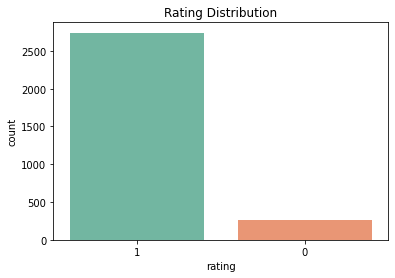

In [9]:
sns.set_palette(sns.color_palette('Set2'))
sns.countplot(
x='rating',
data=data,
order=data.rating.value_counts().index
)
plt.xlabel("rating")
plt.title("Rating Distribution");

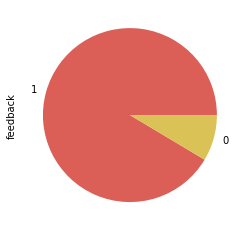

In [10]:
sns.set_palette(sns.color_palette("hls", 8))
data.feedback.value_counts().plot.pie()

In [11]:
data.drop('feedback',axis=1,inplace=True)


In [12]:
def clean(df):
  df['reviews']=df['reviews'].apply(lambda words:re.sub('<.*?>','',words))
  df['reviews']=df['reviews'].apply(word_tokenize)
  df['reviews']=df['reviews'].apply(lambda words: [x.lower() for x in words])
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if not x in punctuation])
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if not x.isdigit()])
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if x not in stopwords.words('english')])
  temp = df['reviews'].apply(lambda words: " ".join(words))
  freq = pd.Series(temp).value_counts()[:10]
  df['reviews'] = df['reviews'].apply(lambda words: [x for x in words if x not in freq.keys()])
  df['reviews'] = df['reviews'].apply(lambda words: " ".join([Word(x).lemmatize() for x in words]))
  return df
